# Gaussian Smoothing

Complete the functions below, and run the cell.

1. `gaussian_kernel()`
2. `convolve()`

The cell first asks the user to upload an image to be smoothed (if the form `upload_image` is on), compute the gaussian kernel, and apply it to the image. The radius and the variance of the kernel are specified by the variables `kernel_radius` and `sigma` via the form in the cell.

----

*hint*: An isotropic 2D Gaussian kernel is given by
\begin{equation}
h(x, y) = \frac{1}{2\pi\sigma^2} \exp\left( -\frac{x^2+y^2}{2\sigma^2}\right),
\end{equation}
where $\sigma$ is the variance, and the Gaussian smoothing is defined as
\begin{equation}
g(x) = f(x) * h(x),
\end{equation}
where $f(x)$ is the uploaded image.


IMAGE:


Saving pre-gaudiff.jpg to pre-gaudiff (6).jpg
Kernel @ Step 1 (initialized):   [-11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6
   7   8   9  10  11]
1D Gaussian Kernel:  [0.0022824  0.00439943 0.00796634 0.01355121 0.02165477 0.03250765
 0.04584314 0.06073229 0.07558256 0.08836497 0.09704993 0.10013062
 0.09704993 0.08836497 0.07558256 0.06073229 0.04584314 0.03250765
 0.02165477 0.01355121 0.00796634 0.00439943 0.0022824 ]
Recreated 1D Gaussian Filter (for s p e e d):  [0.0022824  0.00439943 0.00796634 0.01355121 0.02165477 0.03250765
 0.04584314 0.06073229 0.07558256 0.08836497 0.09704993 0.10013062
 0.09704993 0.08836497 0.07558256 0.06073229 0.04584314 0.03250765
 0.02165477 0.01355121 0.00796634 0.00439943 0.0022824 ]
Recreated 1D Gaussian Filter (for s p e e d):  [0.0022824  0.00439943 0.00796634 0.01355121 0.02165477 0.03250765
 0.04584314 0.06073229 0.07558256 0.08836497 0.09704993 0.10013062
 0.09704993 0.08836497 0.07558256 0.06073229 0.04584314 0.032

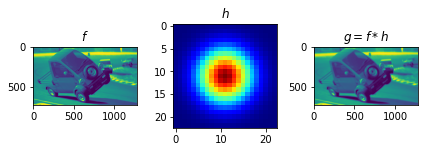

Recreated 1D Gaussian Filter (for s p e e d):  [0.0022824  0.00439943 0.00796634 0.01355121 0.02165477 0.03250765
 0.04584314 0.06073229 0.07558256 0.08836497 0.09704993 0.10013062
 0.09704993 0.08836497 0.07558256 0.06073229 0.04584314 0.03250765
 0.02165477 0.01355121 0.00796634 0.00439943 0.0022824 ]
Recreated 1D Gaussian Filter (for s p e e d):  [0.0022824  0.00439943 0.00796634 0.01355121 0.02165477 0.03250765
 0.04584314 0.06073229 0.07558256 0.08836497 0.09704993 0.10013062
 0.09704993 0.08836497 0.07558256 0.06073229 0.04584314 0.03250765
 0.02165477 0.01355121 0.00796634 0.00439943 0.0022824 ]


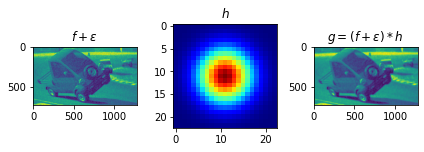

'\ncv2.imwrite("gaussian.png", g)\nfiles.download(\'gaussian.png\')\ncv2.imwrite("gaussian_noise.png", g2)\nfiles.download(\'gaussian_noise.png\')\n'

In [14]:
#@title Gaussian Smoothing
upload_image = True #@param {type:"boolean"}
kernel_radius =  11#@param {type:"integer"}
sigma =  4#@param {type:"number"}

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

"""
Return a 2D Gaussian kernel of size (kernel_radius*2+1, kernel_radius*2+1)
"""
def gaussian_kernel(sigma, kernel_radius):
  #setup
  two_sig_sq = 2*(sigma**2)
  gau_c = 1/(np.sqrt(np.pi*two_sig_sq))
  
  '''
  Creating 1D Gaussian Kernel using the above formula.
  Each line performs one unit of computation at a time. 
  Maybe except for the third step. 

  '''
  #note that it ranges from -radius to radius
  #instead of -1 to 1. This is better when sigma is an integer
  #Like it is the case in the below cells. 
  ker_1 = np.arange(-kernel_radius, kernel_radius+1, 1) 
  #print("Kernel @ Step 1 (initialized):  ", ker_1)
  ker_2 = ker_1 ** 2
  #print("Kernel @ Step 2 (squared):  ", ker_2)
  ker_3 = -ker_2 / two_sig_sq
  #print("Kernel @ Step 3 (negative & divided by 2sig^2):  ", ker_3)
  ker_4 = np.exp(ker_3)
  #print("Kernel @ Step 4 (x as an exponent of e):  ", ker_4)
  ker_5 = gau_c * ker_4
  #print("Kernel @ Step 5 (multiplied by the gaussian constant):  ", ker_5)
  OneD_ker = ker_5 / np.sum(ker_5)
  print("1D Gaussian Kernel: ", OneD_ker)
  #print("np.sum(1D Kernel) result: ", np.sum(OneD_ker))
  #print("\n")

  '''
  2D gaussian Kernel 
  '''
  TwoD_ker = np.outer(OneD_ker, OneD_ker)
  #print("2D Gaussian Kernel - Completed: \n", TwoD_ker)
  #print("np.sum(2D Kernel) result: ", np.sum(TwoD_ker))

  return TwoD_ker


"""
Return f*g as a 2D array of dtype=np.uint8
"""
def convolve(f, g):
  #empty canvas with same image size as f.
  canvas = np.copy(f)
  #preliminary steps
  g_len = len(g)
  k_rad = g_len // 2
  #How would you like your pad?
  pad_type = cv2.BORDER_REFLECT

  """
  Applies a convolutional filter to a row/column.
  This needs to be run twice along different axis.
  Warning: The filter must be symmetrical with respect to both axis.
           Otherwise, no dice.   
  """
  def conv_along_axis(orig, axs="x"):
    img = None
    ax, size = (None, None)
    filter = g[k_rad] / np.sum(g[k_rad])
    print("Recreated 1D Gaussian Filter (for s p e e d): ", filter)
    indices = np.arange(g_len)

    #Selecting the axis
    if axs == "y":
      ax, size = (0, orig.shape[0])
      filter = filter[:,np.newaxis]
      img = cv2.copyMakeBorder(orig, k_rad, k_rad, 0, 0, pad_type)
    else: #defaults to x axis 
      ax, size = (1, orig.shape[1])
      filter = filter[np.newaxis, :]
      img = cv2.copyMakeBorder(orig, 0, 0, k_rad, k_rad, pad_type)

    #print("Current Axis: ", ax)
    #print("filter shape: ", filter.shape)

    #Applying the filter 
    for i in range(0, size):
      chunk = img.take(indices, axis=ax)
      filtered = np.sum(chunk * filter, axis=ax)
      filtered = np.rint(filtered).astype(int)
      if (ax == 0):
        canvas[i] = filtered
      else:
        canvas[:,i] = filtered

      indices = indices + 1

  conv_along_axis(f, axs="y")
  conv_along_axis(canvas)  

  return canvas


# https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv    
def add_salt_and_pepper(img, prob):
    '''Adds "Salt & Pepper" noise to an image.
    img: should be one-channel image with pixels in [0, 255] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy


def upload_sub(msg):
    print(msg)
    f = files.upload()
    if bool(f) is False:
        return None
    fname = list(f.keys())[0]
    return fname


def upload(msg):
    f = None
    while f is None:
        f = upload_sub(msg)
    return f


if upload_image is True:
    f = cv2.imread(upload('IMAGE:'), cv2.IMREAD_GRAYSCALE)
h = gaussian_kernel(sigma, kernel_radius)
g = convolve(f, h)


fig, axes = plt.subplots(1, 3)
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(h, cmap='jet')
axes[1].set_title(r'$h$')
axes[2].imshow(g)
axes[2].set_title(r'$g=f*h$')
fig.tight_layout()
plt.show(fig)

# Add 10% noise
f2 = add_salt_and_pepper(f, 0.1)
g2 = convolve(f2, h)
fig, axes = plt.subplots(1, 3)
axes[0].imshow(f2)
axes[0].set_title(r'$f + \epsilon$')
axes[1].imshow(h, cmap='jet')
axes[1].set_title(r'$h$')
axes[2].imshow(g2)
axes[2].set_title(r'$g=(f+\epsilon)*h$')
fig.tight_layout()
plt.show(fig)

'''
cv2.imwrite("gaussian.png", g)
files.download('gaussian.png')
cv2.imwrite("gaussian_noise.png", g2)
files.download('gaussian_noise.png')
'''


# Median Filtering

Complete the functions below, and run the cell.

* `median_filtering()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and then apply the median filter. The radius of the filter is specified by the variable `kernel_radius` via the form in the cell.


IMAGE:


Saving pre-filter.jpg to pre-filter (3).jpg
shape of f:  (320, 640)
Current Axis:  0
Current Axis:  1


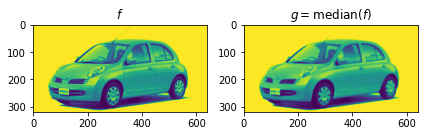

shape of f:  (320, 640)
Current Axis:  0
Current Axis:  1


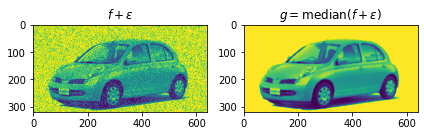

In [ ]:
#@title Median Filtering
upload_image = True #@param {type:"boolean"}
kernel_radius =  3#@param {type:"integer"}

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

"""
Apply the result of median filtering to f.
The size of the window is (kernel_radius*2+1, kernel_radius*2+1).
"""
def median_filtering(f, kernel_radius):
  print("shape of f: ", f.shape)
  #empty canvas with same image size as f.
  canvas = np.zeros(f.shape)
  #preliminary steps
  k_rad = kernel_radius
  g_len = 2*k_rad + 1
  #How would you like your pad?
  pad_type = cv2.BORDER_REFLECT


  """
  Applies the median filter to a row/column.
  This needs to be run twice along different axis.  
  """
  def med_filt_along_axis(orig, axs="x"):
    img = None
    ax, size = (None, None)
    indices = np.arange(g_len)

    if axs == "y":
      ax, size = (0, orig.shape[0])
      filter = g[:,np.newaxis]
      img = cv2.copyMakeBorder(orig, k_rad, k_rad, 0, 0, pad_type)
    else: #defaults to x axis 
      ax, size = (1, orig.shape[1])
      img = cv2.copyMakeBorder(orig, 0, 0, k_rad, k_rad, pad_type)

    print("Current Axis: ", ax)

    for i in range(0, size):
      chunk = img.take(indices, axis=ax)
      filtered = np.median(chunk, axis=ax)
      filtered = np.rint(filtered).astype(int)
      if (ax == 0):
        canvas[i] = filtered
      else:
        canvas[:,i] = filtered

      indices = indices + 1

  med_filt_along_axis(f, axs="y")
  med_filt_along_axis(canvas)  

  return canvas 

    

# https://stackoverflow.com/questions/14435632/impulse-gaussian-and-salt-and-pepper-noise-with-opencv    
def add_salt_and_pepper(img, prob):
    '''Adds "Salt & Pepper" noise to an image.
    img: should be one-channel image with pixels in [0, 255] range
    prob: probability (threshold) that controls level of noise'''

    rnd = np.random.rand(img.shape[0], img.shape[1])
    noisy = img.copy()
    noisy[rnd < prob] = 0
    noisy[rnd > 1 - prob] = 255
    return noisy


def upload_sub(msg):
    print(msg)
    f = files.upload()
    if bool(f) is False:
        return None
    fname = list(f.keys())[0]
    return fname


def upload(msg):
    f = None
    while f is None:
        f = upload_sub(msg)
    return f


if upload_image is True:
    f = cv2.imread(upload('IMAGE:'), cv2.IMREAD_GRAYSCALE)
g = median_filtering(f, kernel_radius)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(g)
axes[1].set_title(r'$g=\mathrm{median}(f)$')
fig.tight_layout()
plt.show(fig)

# Add 10% noise
f2 = add_salt_and_pepper(f, 0.1)
g2 = median_filtering(f2, kernel_radius)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(f2)
axes[0].set_title(r'$f+\epsilon$')
axes[1].imshow(g2)
axes[1].set_title(r'$g=\mathrm{median}(f+\epsilon)$')
fig.tight_layout()
plt.show(fig)

'''
cv2.imwrite("median.png", g)
files.download('median.png')
cv2.imwrite("median_noise.png", g2)
files.download('median_noise.png')
'''


# Sub-Sampling with Gaussian Pre-Filtering

Complete the functions below, and run the cell.

1. `subsampling()`
2. `subsampling_with_gaussian()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and then outputs the sub-sampled images with and without Gaussian prefiltering. The target image size, $1/\mathrm{ratio}$ of the original, is specified by the variable `ratio` via the form in the cell. Similarly the Guassian kernel for prefiltering is specified by `kernel_radius` and `sigma`.


IMAGE:


Saving pre-resize.JPG to pre-resize.JPG
(2048, 3648)
len(ys) and len(xs) should be equal. But is it?  True
1D Gaussian Kernel:  [0.08167442 0.10164546 0.11883558 0.13051536 0.13465836 0.13051536
 0.11883558 0.10164546 0.08167442]
Recreated 1D Gaussian Filter (for s p e e d):  [0.08167442 0.10164546 0.11883558 0.13051536 0.13465836 0.13051536
 0.11883558 0.10164546 0.08167442]
Recreated 1D Gaussian Filter (for s p e e d):  [0.08167442 0.10164546 0.11883558 0.13051536 0.13465836 0.13051536
 0.11883558 0.10164546 0.08167442]
len(ys) and len(xs) should be equal. But is it?  True
gaussian subsampling: 

(409, 729)
Original Image


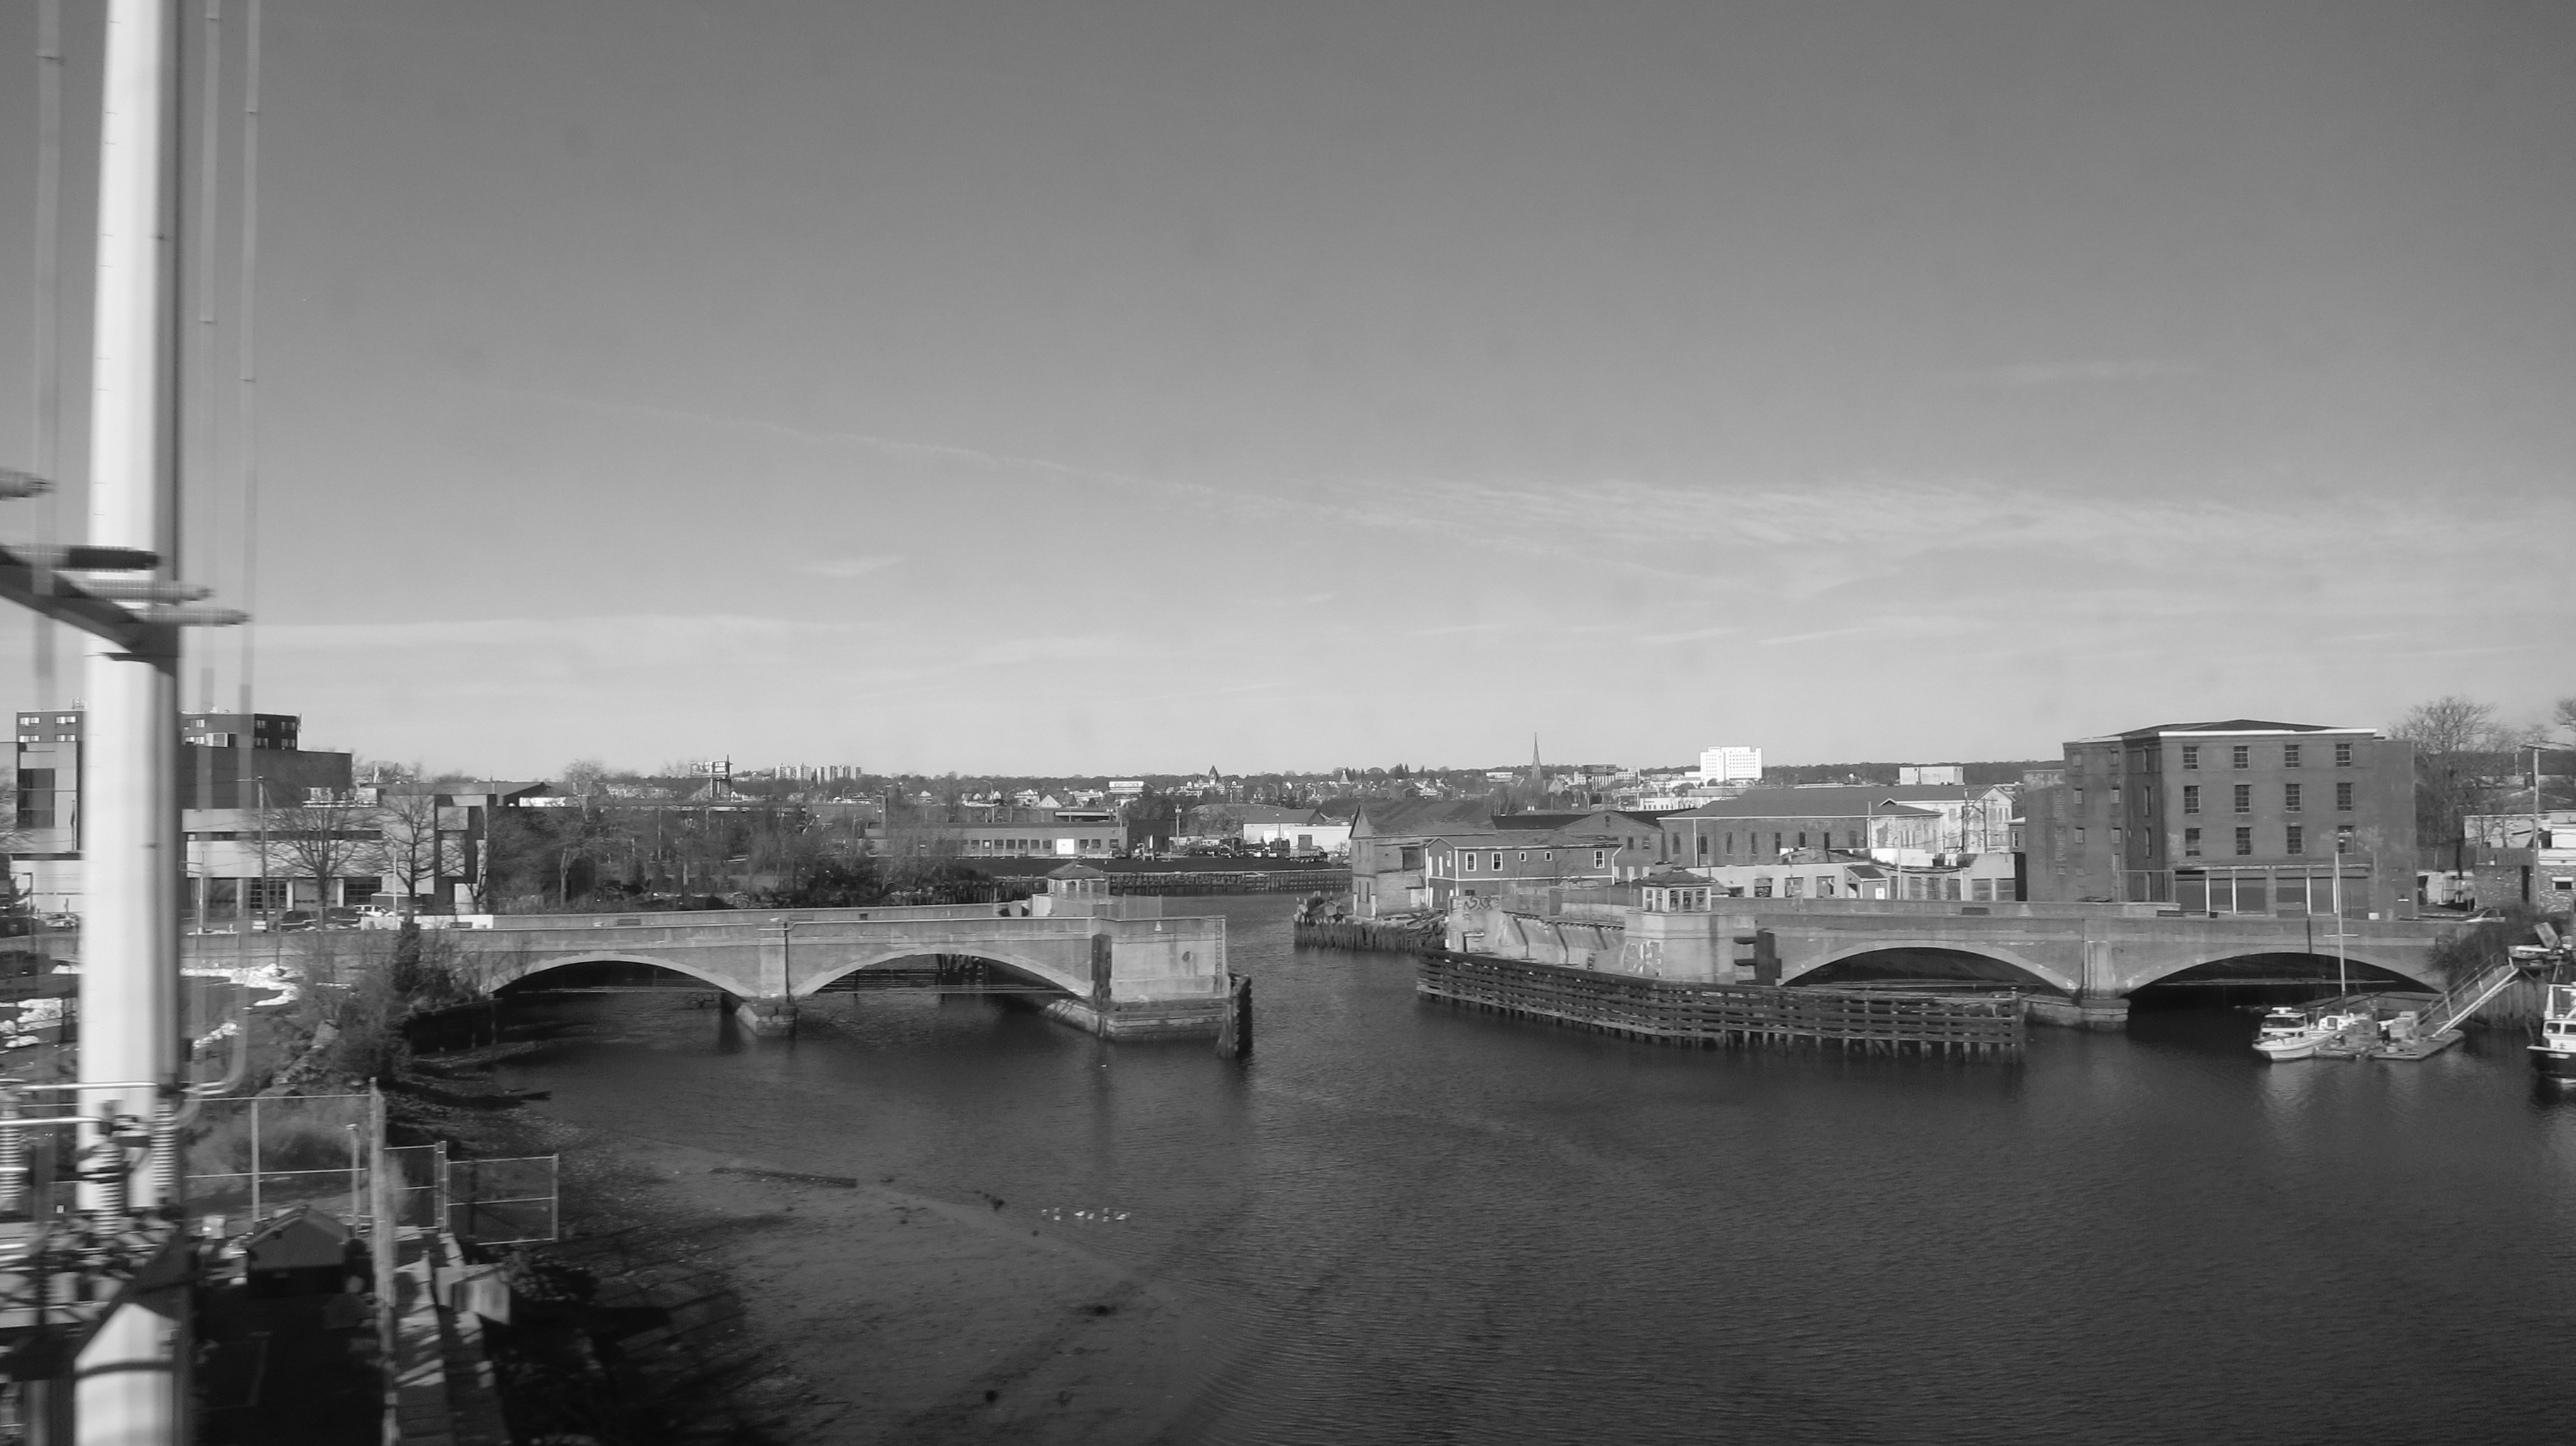

1/5 w/o prefiltering


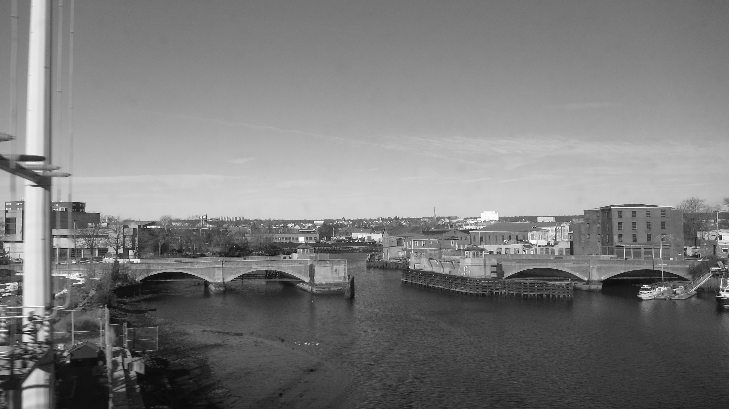

1/5 with prefiltering


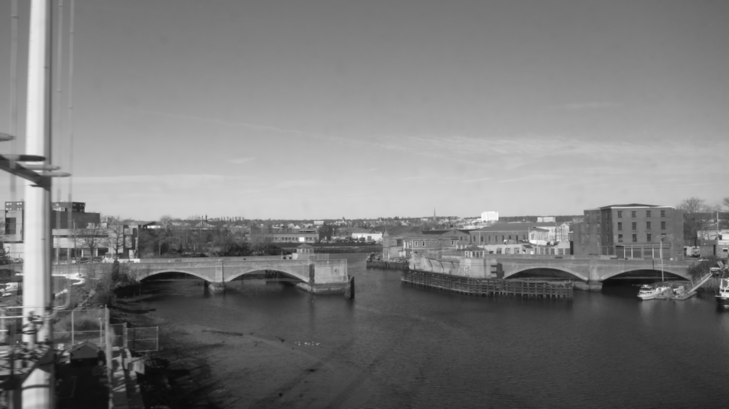

In [ ]:
#@title Sub-Sampling with Gaussian Pre-Filtering
upload_image = True #@param {type:"boolean"}
ratio =  5#@param {type:"integer"}
kernel_radius =  4#@param {type:"integer"}
sigma =  1#@param {type:"integer"}

import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import PIL.Image
from google.colab import files


"""
Subsample the image without prefiltering.
The output image size is (W//ratio, H//ratio), where (W, H) is the size of f.
"""
def subsampling(f, ratio):
  #original image size
  f_ysize, f_xsize = f.shape[0:2]
  #subsampled image size
  y_size, x_size = (f_ysize // ratio, f_xsize // ratio)

  '''
  Selected x and y coordinate indices of the original images. 
  Extracts every (ratio)th pixels of the original image. 
  Created using np.repeat & np.tile like the above lists.  
  '''
  ys = np.repeat(np.linspace(0,f_ysize - 1, y_size), x_size).astype(int)
  xs = np.tile(np.linspace(0,f_xsize - 1, x_size), y_size).astype(int)
  print("len(ys) and len(xs) should be equal. But is it? ", len(ys) == len(xs))

  #return to_return
  return f[ys, xs].reshape(y_size, -1)


"""
Subsample the image with Gaussian prefiltering.
The output image size is (W//ratio, H//ratio), where (W, H) is the size of f.
kernel_radius and sigma specifies the Gaussian kernel.
"""
def subsampling_with_gaussian(f, ratio, kernel_radius, sigma):
  #Prefiltering part
  h = gaussian_kernel(sigma, kernel_radius)
  g = convolve(f, h)
  subs = subsampling(g, ratio)

  print("gaussian subsampling: \n")
  print(subs.shape)
  
  #subsampling part 
  return subs


def upload_sub(msg):
    print(msg)
    f = files.upload()
    if bool(f) is False:
        return None
    fname = list(f.keys())[0]
    return fname


def upload(msg):
    f = None
    while f is None:
        f = upload_sub(msg)
    return f


def show_raw(img):
    IPython.display.display(PIL.Image.fromarray(img))


if upload_image is True:
    f = cv2.imread(upload('IMAGE:'), cv2.IMREAD_GRAYSCALE)

print(f.shape)
g1 = subsampling(f, ratio)
g2 = subsampling_with_gaussian(f, ratio, kernel_radius, sigma)

print('Original Image')
show_raw(f)
print('1/%d w/o prefiltering' % ratio)
show_raw(g1)
print('1/%d with prefiltering' % ratio)
show_raw(g2)

'''
cv2.imwrite("subsample.png", g)
files.download('subsample.png')
cv2.imwrite("subsample_gaussianpre.png", g2)
files.download('subsample_gaussianpre.png')
'''


# Difference of Gaussians

Complete the functions below, and run the cell.

1. `difference_of_gaussians_1()`
2. `difference_of_gaussians_2()`

The cell first asks the user to upload an image (if the form `upload_image` is on), and computes the difference of Gaussians in two different approaches.

The funstion `difference_of_gaussian_1()` computes Gaussian smoothing with two different kernels (`kernel_radius1`&`sigma1`, `kernel_radius2`&`sigma2`), and then returns their absolute difference.

The function `difference_of_gaussian_2()` computes Gaussian smoothing with a single kernel (`kernel_radius1`&`sigma1`) for two images of different sizes: the original image and its $1/\mathrm{ratio}$ subsampled one.

By choosing `kernel_radius1`, `sigma1`, `kernel_radius2`, `sigma2`, and `ratio` appropriately, the two output images become visually identical to each other.


IMAGE:


Saving pre-gaudiff.jpg to pre-gaudiff (4).jpg
1D Gaussian Kernel:  [0.13312014 0.14269314 0.14876429 0.15084488 0.14876429 0.14269314
 0.13312014]
1D Gaussian Kernel:  [0.06538573 0.06593008 0.06639423 0.06677641 0.06707519 0.06728942
 0.06741829 0.0674613  0.06741829 0.06728942 0.06707519 0.06677641
 0.06639423 0.06593008 0.06538573]
Recreated 1D Gaussian Filter (for s p e e d):  [0.13312014 0.14269314 0.14876429 0.15084488 0.14876429 0.14269314
 0.13312014]
Recreated 1D Gaussian Filter (for s p e e d):  [0.13312014 0.14269314 0.14876429 0.15084488 0.14876429 0.14269314
 0.13312014]
Recreated 1D Gaussian Filter (for s p e e d):  [0.06538573 0.06593008 0.06639423 0.06677641 0.06707519 0.06728942
 0.06741829 0.0674613  0.06741829 0.06728942 0.06707519 0.06677641
 0.06639423 0.06593008 0.06538573]
Recreated 1D Gaussian Filter (for s p e e d):  [0.06538573 0.06593008 0.06639423 0.06677641 0.06707519 0.06728942
 0.06741829 0.0674613  0.06741829 0.06728942 0.06707519 0.06677641
 0.06639423 

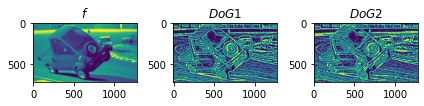

'\ncv2.imwrite("gaudiff2.png", g2)\nfiles.download(\'gaudiff2.png\')\n'

In [ ]:
#@title Difference of Gaussians
upload_image = True #@param {type:"boolean"}
kernel_radius1 = 3 #@param {type:"integer"}
sigma1 = 2 #@param {type:"integer"}
kernel_radius2 = 7 #@param {type:"integer"}
sigma2 = 4 #@param {type:"integer"}
ratio = 2 #@param {type:"integer"}

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


def difference_of_gaussians_1(f, kernel_radius1, sigma1, kernel_radius2, sigma2):
    """
    Computes the difference of Gaussians
    """
    assert kernel_radius1 > 0
    assert kernel_radius2 > 0
    assert sigma1 > 0
    assert sigma2 > 0

    h_1 = gaussian_kernel(sigma1, kernel_radius1)
    h_2 = gaussian_kernel(sigma2, kernel_radius2)

    g1 = convolve(f, h_1)
    g2 = convolve(f, h_2)
    
    return np.absolute(g1 - g2) 
    
    

def difference_of_gaussians_2(f, kernel_radius, sigma, ratio):
    """
    Computes the difference of Gaussians
    """
    assert kernel_radius1 > 0
    assert kernel_radius2 > 0
    assert sigma1 > 0
    assert sigma2 > 0

    h = gaussian_kernel(sigma, kernel_radius)

    
    g1 = convolve(f, h)
    g2 = subsampling(f, ratio)
    g3 = convolve(g2, h)

    #Upscaled the downsampled filter-applied image.
    dim = (g1.shape[1], g1.shape[0])
    g4 = cv2.resize(g3, dim)
    
    return np.absolute(g1 - g4)
    
    

def upload_sub(msg):
    print(msg)
    f = files.upload()
    if bool(f) is False:
        return None
    fname = list(f.keys())[0]
    return fname


def upload(msg):
    f = None
    while f is None:
        f = upload_sub(msg)
    return f


if upload_image is True:
    f = cv2.imread(upload('IMAGE:'), cv2.IMREAD_GRAYSCALE)

g1 = difference_of_gaussians_1(f, kernel_radius1, sigma1, kernel_radius2, sigma2)
g2 = difference_of_gaussians_2(f, kernel_radius1, sigma1, ratio)

fig, axes = plt.subplots(1, 3)
axes[0].imshow(f)
axes[0].set_title(r'$f$')
axes[1].imshow(g1)
axes[1].set_title(r'$DoG1$')
axes[2].imshow(g2)
axes[2].set_title(r'$DoG2$')
fig.tight_layout()
plt.show(fig)


'''
cv2.imwrite("gaudiff1.png", g1)
files.download('gaudiff1.png')
cv2.imwrite("gaudiff2.png", g2)
files.download('gaudiff2.png')
'''

